# Ce programme permet d'estimer la valeur moyenne et l'incertitude-type sur la valeur obtenue lors d'un dosage par étalonnage

## Dans cet exercice il faudra :
###     1. Compléter les listes des concentrations et conductivités
###     2. Préciser la valeur de la conductivité de la solution de sérum
###     3. Préciser les incertitudes-types sur les concentrations et les conductivités

### Chaque partie de code est précédée d'un titre.
### Certaines parties de code sont à modifier par vous, cela est indiqué par la mention $\color {red} {"A\: VOUS\: DE\: JOUER\,!"}$ dans le titre de la partie.

## Etape 0 : On importe les bibliothèques nécessaires

In [1]:
import numpy as np # Bibliothèque permettant le calcul scientifique
import matplotlib.pyplot as plt # Bibliothèque permettant de tracer des graphiques
from scipy.optimize import curve_fit # Bibliothèque permettant d'optimiser un modèle

## Etape 1 : On entre les listes de mesures et les incertitudes associées à ces mesures
### $\color {red} {"A\: VOUS\: DE\: JOUER\,!"}$

In [2]:
#déclaration des listes de concentration C et conductivité S et de la conductivité S_inc de la solution inconnue
C = np.array(['A modifier']) # Liste contenant les valeurs des concentrations
S = np.array(['A modifier']) # Liste contenant les valeurs de conductivités
S_inc = 'A modifier' # Valeur de la conductivité de la solution de sérum

#déclaration des incertitudes sur les mesures de C et S
uC = 'A modifier' # Incertitude-type sur les concentrations
uS = 'A modifier' # Incertitudes-types sur les conductivités

## Etape 2 : On initialise les variables et la fonction nécessaires aux calculs.

In [3]:
#Nombre de fois où on fait les calculs (nécessairement supérieur à 1 !)
iterations = 1000

#Création des listes contenant les valeurs aléatoires calculées pour C, S et C_inc
C_alea=[]
S_alea=[]
LC_inc=[]

# Définition de la fonction de modélisation, elle est linéaire ici y = a*x
def modele(x, a):
    return a * x

## Etape 3 : On simule "iterations" fois un dosage par étalonnage

In [4]:
#On fait "iterations" fois les opérations suivantes
for i in range(iterations):    
    
    #On crée une liste aléatoire de chaque grandeur C et S
    for j in range(len(C)):

        VC = C[j]+uC*np.random.normal()
        C_alea.append(VC)
    
        VS = S[j]+uS*np.random.normal()
        S_alea.append(VS)
    
    #On fait la régression linéaire de la répartition aléatoire de C et S, S = k*C
    k, _ = curve_fit(modele, C_alea, S_alea) # On calcule la meilleure valeur de k pour l'ajustement linéaire
    
    #On calcule une valeur de C_inc de la concentration inconnue
    C_inc = (S_inc+uS*np.random.normal()) / k[0]
    
    #On Multiplie la valeur obtenue par 20 pour obtenir la valeur réelle
    C_inc = C_inc*20
    
    #On stocke la valeur de C_inc dans une liste regroupant l'ensemble des valeurs obtenues
    LC_inc.append(C_inc)

## Etape 4 : On affiche les résultats obtenus

Concentration inconnue (Valeur moyenne) :  664.6155539765283  g/L
u(C_inc):  10.614752199348013  g/L


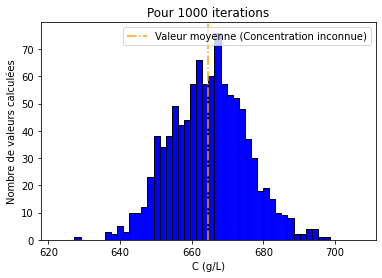

In [5]:
#On calcule et on affiche la moyenne des valeurs C_inc calculées et l'incertitude-type
MoyCinc = sum(LC_inc)/iterations
uCinc = (1/(iterations-1)*sum((np.array(LC_inc)-MoyCinc)**2))**0.5

print('Concentration inconnue (Valeur moyenne) : ', MoyCinc, ' g/L')
print('u(C_inc): ', uCinc, ' g/L')

#On affiche l'histogramme de répartition des valeurs C_inc obtenues
plt.hist(LC_inc, range = (MoyCinc-4*uCinc, MoyCinc+4*uCinc), bins = 50, color = 'blue', edgecolor = 'black')
plt.axvline(MoyCinc, color="orange", linestyle="-.", label='Valeur moyenne (Concentration inconnue)')
plt.title('Pour ' + str(iterations) + ' iterations')
plt.xlabel('C (g/L)')
plt.ylabel('Nombre de valeurs calculées')
plt.legend()
plt.show()